In [1]:
from src.EfficientCategoricalModel import EfficientCategoricalModel
from src.models.Deep import model as imported_model
from src.optimizers.Adam import optimizer as imported_optimizer

Initializing efficient categorical model training...
feature_sets 17
targets 37
small 42
medium 705
all 2376
Dataset has 2,746,270 rows
Found 42 feature columns and 1 target columns
Creating dataset pipeline...
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 42)]                 0         []                            
                                                                                                  
 lambda (Lambda)             (None, 42)                   0         ['input_1[0][0]']             
                                                                                                  
 feature_interaction_layer   (None, 903)                  0         ['lambda[0][0]']              
 (FeatureInteractionLayer)                                                       

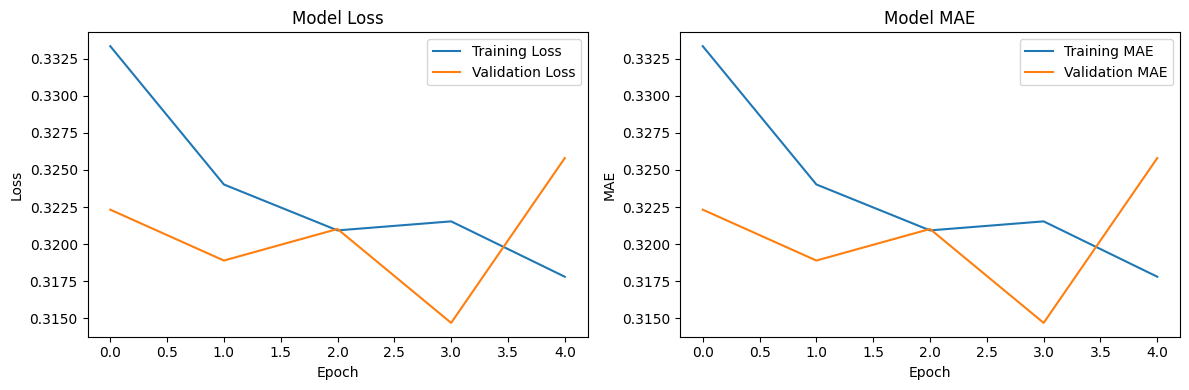

Training complete!


In [2]:
try:
    print("Initializing efficient categorical model training...")

    data_path = "data/train.parquet"
    val_path = "data/validation.parquet"
    meta_path = "data/features.json"
    meta_model = "data/meta_model.parquet"
    # Initialize model with smaller batch size
    efficient_model = EfficientCategoricalModel(
        data_path_train = data_path, 
        data_path_val = val_path,
        data_path_metadata = meta_path,
        data_path_meta_model = meta_model,
        batch_size=64,  # Small power-of-2 batch size for memory alignment
        model=imported_model,
        optimizer=imported_optimizer
        )
        
        # Train with fewer epochs
    model, history = efficient_model.train(epochs=5)

    print("Training complete!")
        
except Exception as e:
    print(f"Error occurred: {str(e)}")
    import traceback
    traceback.print_exc()

    
